In [15]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score
from moseq2_lda.viz.viz2d import plot_lda_weights
#%matplotlib qt

In [2]:
model_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\Celsr3_1894G\2022-09-01_Celsr3_1894G\models-mean-target\rOT_model_1000-035.fixed.p"
index_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\Celsr3_1894G\2022-09-01_Celsr3_1894G\moseq2-index.sex-genotype.yaml"

max_syllable = 67

#groups = ['baseline', '4hrs carrageenan', '24hrs saline', '24hrs meloxicam', 'baseline meloxicam']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493', '#020887', '#647aa3'])
#markers = ['o', 's', '^', 'P', 'X']


#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan + saline']
#palette = sns.color_palette(['#35fab3', '#ff8400', '#f06493'])
#markers = ['o', 's', '^']
#groups = None
#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan']

#groups = ['baseline', '4hrs carrageenan', '24hrs carrageenan', '6d carrageenan', '14d carrageenan', '24hrs carrageenan + saline', '24hrs carrageenan + meloxicam']
#palette = sns.color_palette('deep', n_colors=len(groups))
#markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

groups = [
    'F_+/+',
    'F_+/KI',
    'M_+/+',
    'M_+/KI',
]


#exclude_uuids = [] # [
#    '2e4fb355-0907-4c6c-9318-11556620a9c0'
#]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
#groups = list(set(representations.groups))
palette = sns.color_palette('deep', n_colors=len(groups))
marker_pool = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd']
markers = [marker_pool[i % len(marker_pool)] for i in range(len(groups))]
len(markers)

pruned 2252 transitions which are never used


4

Best value for parameter "shrinkage" is 0.60, achieving a mean accuracy of ~65.5% ± 10.67% (stdev) on cross-validated data
Below are performance metrics for estimator using best parameter trained on the entire training dataset and evaluated on held out test data (not used in cross-validation)
              precision    recall  f1-score   support

       F_+/+       0.50      1.00      0.67         8
      F_+/KI       0.50      0.50      0.50        10
       M_+/+       0.33      0.25      0.29         8
      M_+/KI       0.78      0.47      0.58        15

    accuracy                           0.54        41
   macro avg       0.53      0.55      0.51        41
weighted avg       0.57      0.54      0.52        41

LDA Score: 0.7238805970149254
LDA Explained Variance: [0.06969581 0.04085825]
              precision    recall  f1-score   support

       F_+/+       0.62      0.80      0.70        25
      F_+/KI       0.67      0.79      0.72        33
       M_+/+       0.68      0

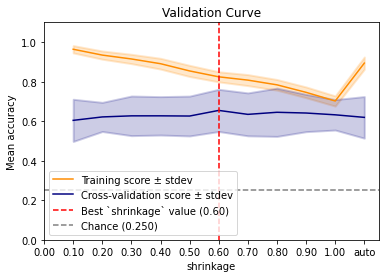

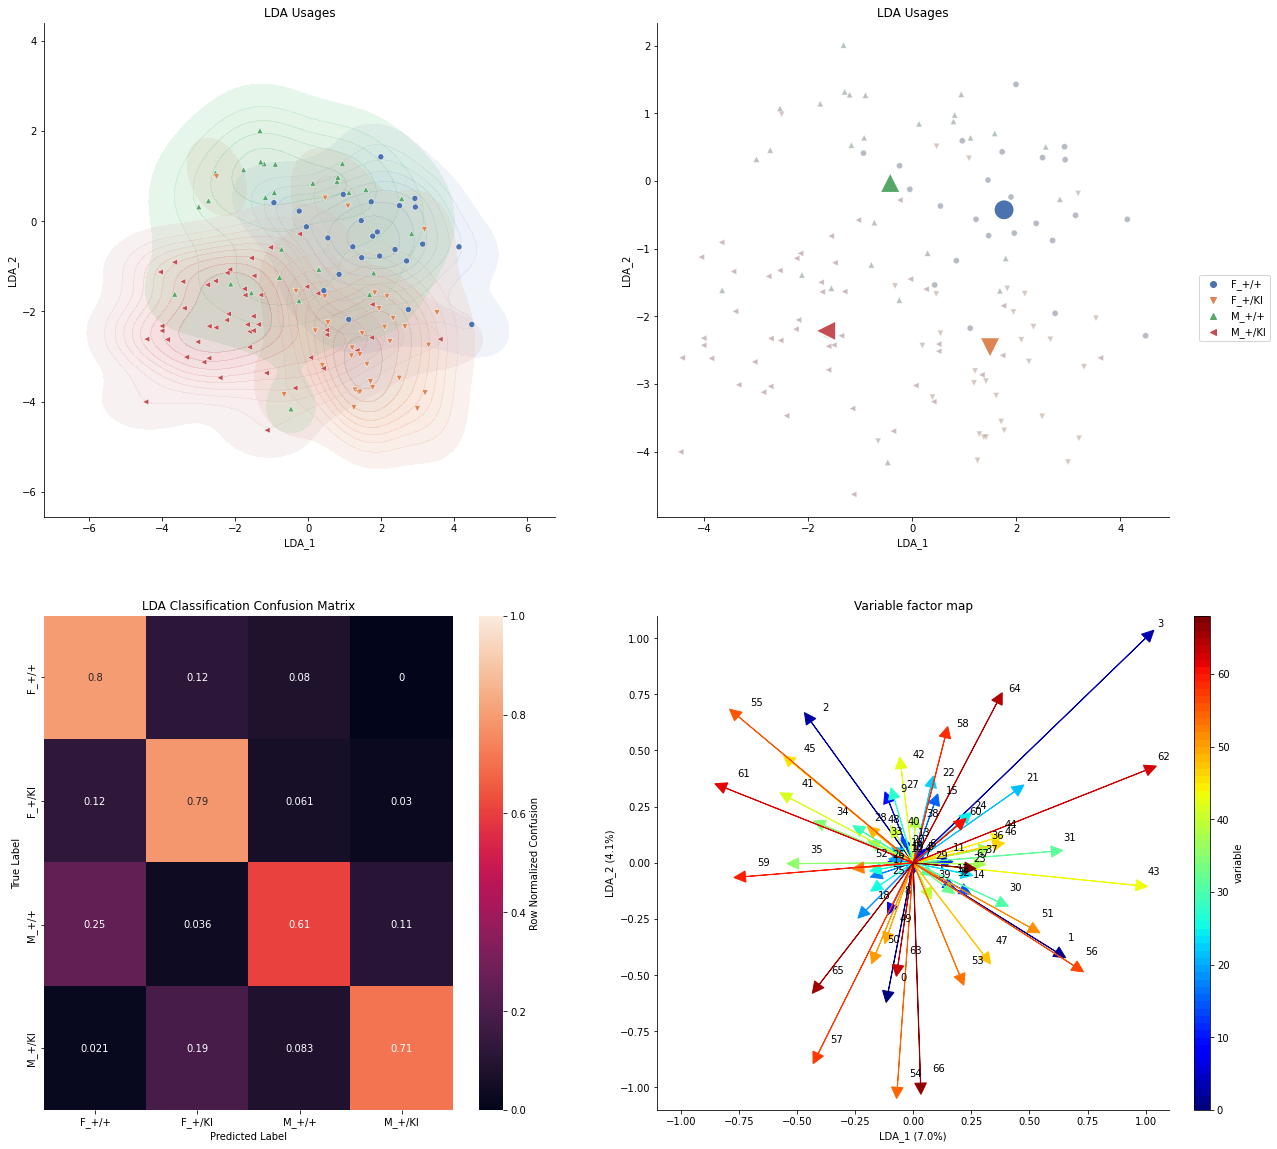

In [21]:
results = train_lda_pipeline(representations, 'usage')
plot_validation_curve(results.cv_result)
fig, axs, df = plot_lda_results(results.estimator, representations.usage, representations.meta, representations.groups, groups, palette, markers, title='LDA Usages')

<AxesSubplot:xlabel='Accuracy score', ylabel='Probability'>

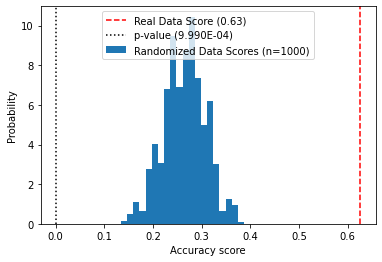

In [8]:
plot_permutation_score(results.estimator, results.data.usage, results.data.groups)

In [17]:
results.estimator[-1].coef_

array([[ 4.40836669e+02,  3.66157030e+02,  4.18822751e+02,
         3.53272957e+02,  4.04231798e+02,  3.28738277e+02,
         3.68102534e+02,  4.17001682e+02,  4.95730782e+02,
         2.56491276e+02,  2.90262210e+02,  3.45000163e+02,
         3.65501834e+02,  2.69971917e+02,  3.95645410e+02,
         3.69089348e+02,  3.19978599e+02,  3.21804670e+02,
         2.85908211e+02,  2.83699532e+02,  3.08136656e+02,
         1.99607515e+02,  3.16699418e+02,  2.30247943e+02,
         2.96898076e+02,  3.33524223e+02,  1.90611822e+02,
         2.96412157e+02,  2.61724586e+02,  2.67871080e+02,
         2.05132249e+02,  2.15896020e+02,  1.91186996e+02,
         2.43317422e+02,  1.28261619e+02,  2.47305049e+02,
         2.50062568e+02,  2.10547318e+02,  1.97887694e+02,
         1.61390995e+02,  1.52545607e+02,  1.64072182e+02,
         2.06425644e+02,  1.10204132e+02,  1.37016475e+02,
         1.02389062e+02,  1.83891246e+02,  1.65714946e+02,
         1.23989025e+02,  1.00401914e+02,  1.25948881e+0

<AxesSubplot:title={'center':'LDA Feature Weights'}, xlabel='Class', ylabel='Feature'>

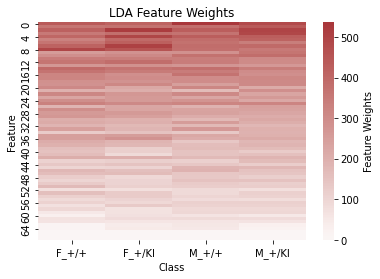

In [16]:
plot_lda_weights(results.estimator[-1].coef_, groups)

Best value for parameter "shrinkage" is 0.50, achieving a mean accuracy of ~60.3% ± 9.64% (stdev) on cross-validated data
Below are performance metrics for estimator using best parameter trained on the entire training dataset and evaluated on held out test data (not used in cross-validation)
              precision    recall  f1-score   support

       F_+/+       0.57      0.50      0.53         8
      F_+/KI       0.80      0.40      0.53        10
       M_+/+       0.38      0.75      0.50         8
      M_+/KI       0.77      0.67      0.71        15

    accuracy                           0.59        41
   macro avg       0.63      0.58      0.57        41
weighted avg       0.66      0.59      0.59        41

LDA Score: 0.8731343283582089
LDA Explained Variance: [0.05423187 0.04991431]
              precision    recall  f1-score   support

       F_+/+       0.88      0.84      0.86        25
      F_+/KI       0.96      0.82      0.89        33
       M_+/+       0.72      0.

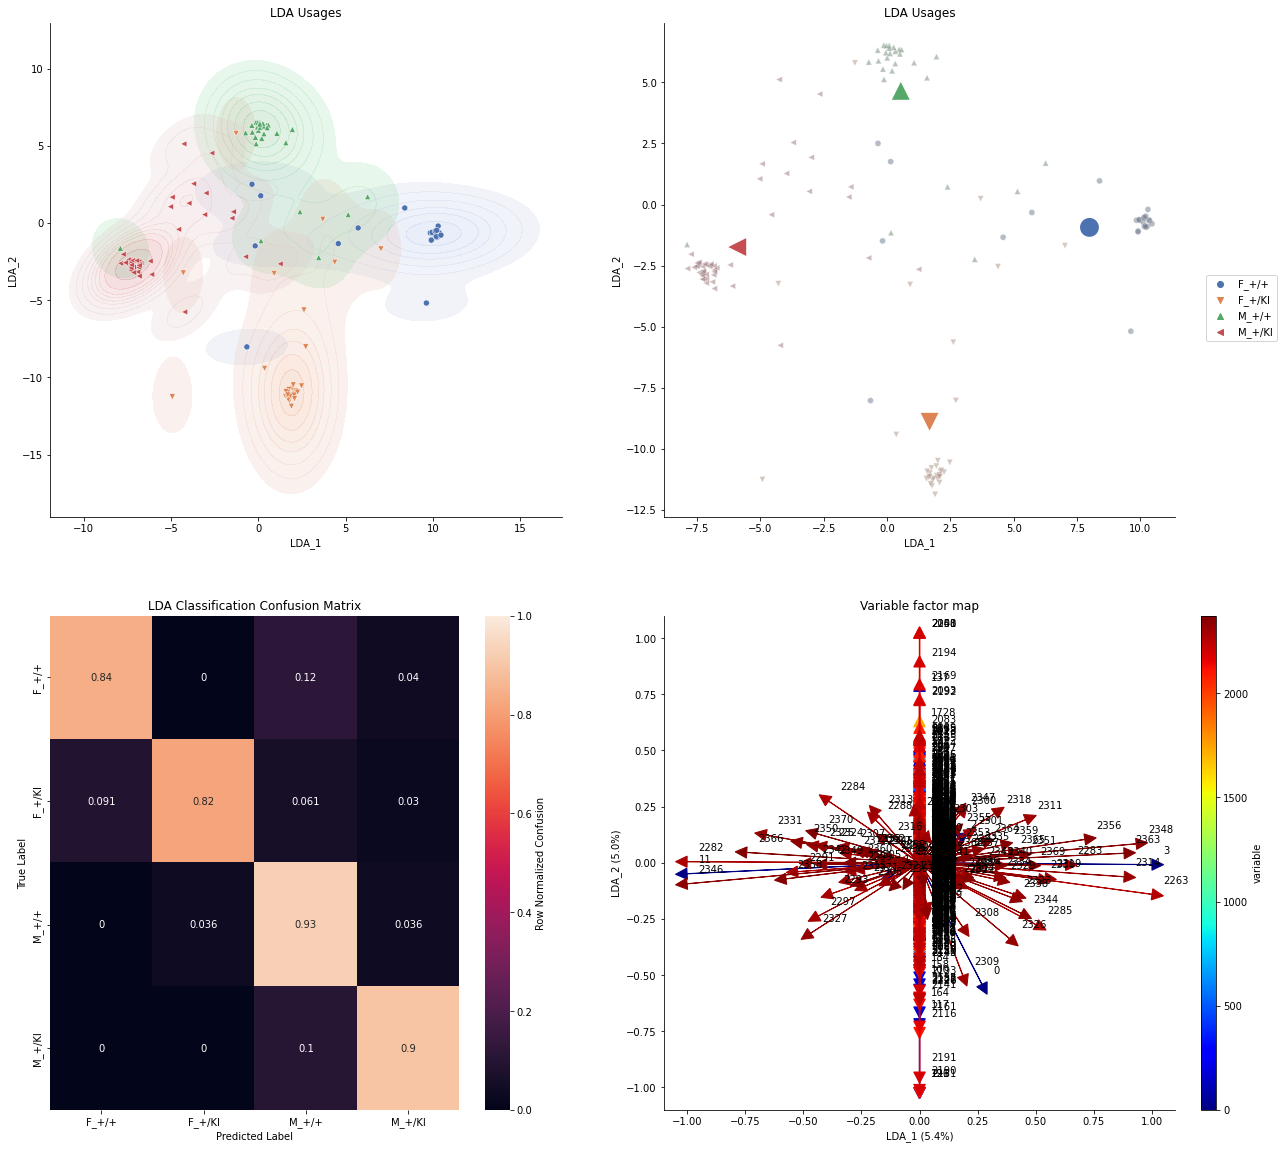

In [18]:
results = train_lda_pipeline(representations, 'trans')

fig, axs, df = plot_lda_results(results.estimator, representations.trans, representations.meta, representations.groups, groups, palette, markers, title='LDA Usages')

<AxesSubplot:title={'center':'Validation Curve'}, xlabel='shrinkage', ylabel='Mean accuracy'>

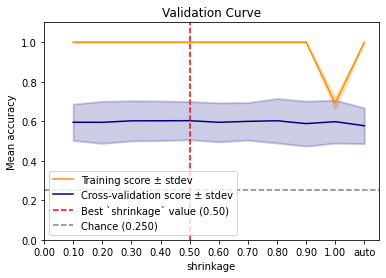

In [20]:
plot_validation_curve(results.cv_result)